In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy.stats import kendalltau, pearsonr, spearmanr
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('TripDuration.csv')

In [3]:
df = df.drop('Unnamed: 0',1)

In [4]:
pearsonCorr = df.corr('pearson')
spearmanCorr = df.corr('spearman')

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

pearson_pval = df.corr(method=pearsonr_pval)
spearman_pval = df.corr(method=spearmanr_pval)

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

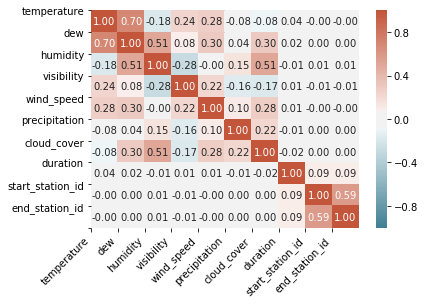

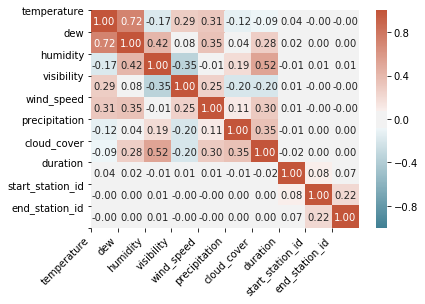

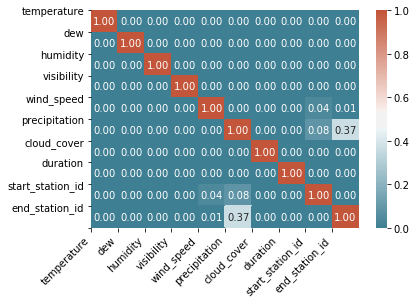

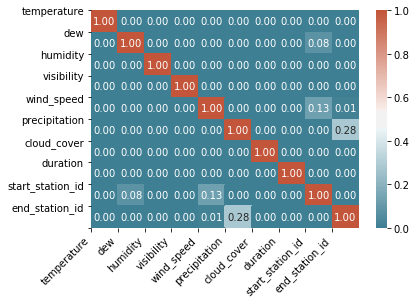

In [5]:
corr=pearsonCorr
ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap=cmap,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)+1), corr.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right');
plt.show()

corr=spearmanCorr
ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap=cmap,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)+1), corr.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right');
plt.show()

corr=pearson_pval
ax = sns.heatmap(corr, annot=True, vmax=1, vmin=0, cmap=cmap,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)+1), corr.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right');
plt.show()

corr=spearman_pval
ax = sns.heatmap(corr, annot=True, vmax=1, vmin=0, cmap=cmap,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)+1), corr.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set_yticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right');
plt.show()

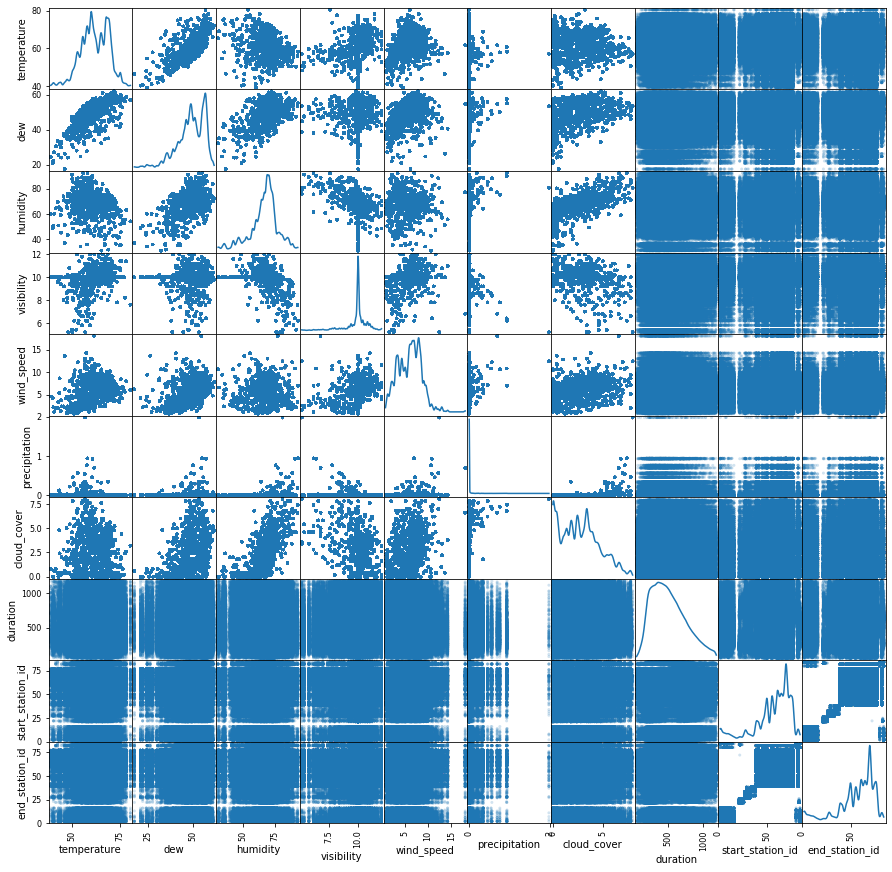

In [12]:
#scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
#plt.show()

r-squared: 0.00013092157131135615
p_value: 5.244467068323157e-19
slope: -3.525438515087933e-06
std_err 3.957934459317934e-07


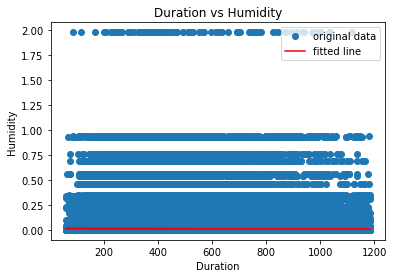

In [19]:
from scipy import stats
x = df.duration
y = df.precipitation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("std_err", std_err)


plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title(label='Duration vs Humidity')
plt.xlabel(xlabel='Duration')
plt.ylabel(ylabel='Humidity')
plt.legend()
plt.show()

In [21]:
df.duration /= 60

In [22]:
df.duration

0          1.050000
1          1.166667
2          1.183333
3          1.283333
4          1.383333
            ...    
605925    14.533333
605926     6.566667
605927    18.566667
605928    14.500000
605929    15.133333
Name: duration, Length: 605930, dtype: float64

In [6]:
df.humidity.unique()

array([75.  , 79.  , 71.  , 72.  , 69.  , 70.  , 73.  , 68.  , 65.  ,
       66.  , 67.  , 62.  , 77.  , 76.  , 58.  , 64.  , 74.  , 63.  ,
       60.  , 57.  , 54.  , 59.  , 55.  , 50.  , 45.  , 78.  , 80.  ,
       82.  , 61.  , 48.  , 81.  , 53.  , 44.  , 46.  , 52.  , 56.  ,
       47.  , 43.  , 38.  , 25.  , 34.  , 36.  , 33.  , 31.  , 40.  ,
       41.  , 32.  , 49.  , 39.  , 51.  , 83.  , 86.  , 84.  , 85.  ,
       90.  , 95.  , 89.  , 30.  , 37.  , 87.  , 42.  , 92.  , 88.  ,
       93.  , 91.  , 94.  , 74.75, 26.  , 28.  , 35.  , 29.  , 71.25,
       24.  , 74.25, 70.5 , 72.5 , 70.75, 73.75, 83.5 , 92.25, 64.5 ,
       68.75, 72.25, 75.5 , 86.25, 88.75, 96.  , 86.5 , 92.5 , 90.25,
       85.75, 88.5 , 84.25, 80.75, 87.75, 76.5 , 88.25, 85.5 , 78.25,
       86.75, 89.25, 87.5 , 80.25, 82.75, 52.75, 62.5 , 67.75, 70.25])